In [4]:
!pip install pycaret

In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
df_data = pd.read_csv("athlete_events.csv")
df_regions = pd.read_csv("noc_regions.csv")
df = pd.merge(df_data, df_regions, on="NOC", how="left")

In [3]:
df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [4]:
df = df[df['Medal'].notna()]

In [5]:
df = df[df['Height'].notna()]

In [6]:
df = df[df['Weight'].notna()]

In [7]:
df = df[df['Age'].notna()]

In [8]:
df = df[df['region'].notna()]

In [9]:
medal = {'Gold': 1,'Silver': 2,'Bronze': 3}

In [10]:
df.Medal = [medal[item] for item in df.Medal]

In [11]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,3,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,3,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,1,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,1,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,1,Finland,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,2,Russia,NaN
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,3,Russia,NaN
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",3,Poland,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,3,Russia,NaN


In [12]:
df = df[['Sex','Age','Height','Weight','Sport', 'Medal', 'region']]

In [13]:
df

,Sex,Age,Height,Weight,Sport,Medal,region
40,M,28.0,184.0,85.0,Ice Hockey,3,Finland
41,M,28.0,175.0,64.0,Gymnastics,3,Finland
42,M,28.0,175.0,64.0,Gymnastics,1,Finland
44,M,28.0,175.0,64.0,Gymnastics,1,Finland
48,M,28.0,175.0,64.0,Gymnastics,1,Finland
...,...,...,...,...,...,...,...
271078,F,25.0,168.0,80.0,Athletics,2,Russia
271080,F,33.0,168.0,80.0,Athletics,3,Russia
271082,M,28.0,182.0,82.0,Fencing,3,Poland
271102,F,19.0,171.0,64.0,Athletics,3,Russia


In [14]:
df['Weight'].dtypes

dtype('float64')

In [15]:
df['Weight'] = df['Weight'].astype(int)

In [16]:
df['Age'] = df['Age'].astype(int)

In [17]:
df['Height'] = df['Height'].astype(int)

In [18]:
df['Height'].dtypes

dtype('int64')

In [19]:
df

,Sex,Age,Height,Weight,Sport,Medal,region
40,M,28,184,85,Ice Hockey,3,Finland
41,M,28,175,64,Gymnastics,3,Finland
42,M,28,175,64,Gymnastics,1,Finland
44,M,28,175,64,Gymnastics,1,Finland
48,M,28,175,64,Gymnastics,1,Finland
...,...,...,...,...,...,...,...
271078,F,25,168,80,Athletics,2,Russia
271080,F,33,168,80,Athletics,3,Russia
271082,M,28,182,82,Fencing,3,Poland
271102,F,19,171,64,Athletics,3,Russia


In [20]:
minValuesObj = df.min()
print('minimum value in each column : ')
print(minValuesObj)

minimum value in each column : 
Sex                   F
Age                  13
Height              136
Weight               28
Sport     Alpine Skiing
Medal                 1
region      Afghanistan
dtype: object


In [21]:
maxValuesObj = df.max()
print('max value in each column : ')
print(maxValuesObj)

max value in each column : 
Sex               M
Age              66
Height          223
Weight          182
Sport     Wrestling
Medal             3
region     Zimbabwe
dtype: object


In [22]:
df['region'].unique()

array(['Finland', 'Norway', 'Netherlands', 'Italy', 'Spain', 'Azerbaijan',
       'Russia', 'Belarus', 'France', 'Cameroon', 'USA', 'Hungary',
       'Australia', 'Iran', 'Canada', 'Pakistan', 'Uzbekistan',
       'Tajikistan', 'Japan', 'Ethiopia', 'Germany', 'Sweden', 'Turkey',
       'Bulgaria', 'Egypt', 'UK', 'Jordan', 'Romania', 'Switzerland',
       'Puerto Rico', 'Mexico', 'Ghana', 'Morocco', 'New Zealand',
       'Argentina', 'Cuba', 'Poland', 'Czech Republic', 'Nigeria',
       'Brazil', 'Lithuania', 'South Africa', 'Indonesia', 'Chile',
       'Ukraine', 'Greece', 'Uganda', 'Syria', 'Qatar', 'Kuwait',
       'Individual Olympic Athletes', 'Saudi Arabia',
       'United Arab Emirates', 'Croatia', 'Armenia', 'Serbia', 'Niger',
       'India', 'Algeria', 'Austria', 'Trinidad', 'Colombia', 'Botswana',
       'Tunisia', 'South Korea', 'North Korea', 'China', 'Denmark',
       'Uruguay', 'Guyana', 'Kazakhstan', 'Georgia', 'Kenya', 'Iceland',
       'Jamaica', 'Malaysia', 'Slovakia',

In [23]:
reg1 = setup(data = df, target = 'Medal', numeric_features=['Age','Weight','Height'])

,Description,Value
0,session_id,4503
1,Target,Medal
2,Original Data,"(30172, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(21120, 183)"


In [24]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6644,0.6447,0.8029,0.0444,-0.0,0.4221
1,0.6600,0.6331,0.7957,0.0540,-0.0,0.4100
2,0.6712,0.6571,0.8106,0.0302,-0.0,0.4217
3,0.6624,0.6417,0.8011,0.0509,-0.0,0.4209
4,0.6661,0.6520,0.8074,0.0319,-0.0,0.4334
5,0.6704,0.6544,0.8090,0.0341,-0.0,0.4257
6,0.6675,0.6586,0.8115,0.0176,-0.0,0.4250
7,0.6577,0.6344,0.7965,0.0459,-0.0,0.4092
8,0.6562,0.6308,0.7942,0.0443,-0.0,0.4281
9,0.6711,0.6555,0.8096,0.0236,-0.0,0.4342


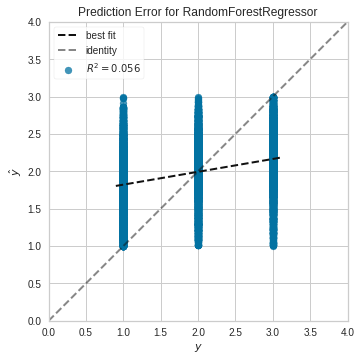

In [25]:
plot_model(rf, plot = 'error')

In [26]:
final_rf = finalize_model(rf)

In [27]:
test_data = pd.DataFrame({'Sex': ['male'],
                          'Age': [28], 
                          'Height': [184], 
                          'Weight': [85], 
                          'Sport' : ['Ice Hockey'], 
                          'region': ['Finland']})

predictions = predict_model(final_rf, data = test_data)
predictions

,Sex,Age,Height,Weight,Sport,region,Label
0,male,28,184,85,Ice Hockey,Finland,2.96


In [28]:
save_model(final_rf, 'rf_model2')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Age', 'Weight',
                                                           'Height'],
                                       target='Medal', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=None,
  